# NLP Summer 2020 - Assignement 1 - Exercise 4 
## Vishaal Khanna - 120333
## Sneha Mohanty - 120799
## Sagar Nagaraj Simha - 120797

## Exercise 4 a) Recalculation of statistical parameters from Exercise 3 for austen, bronte and disputed

In [1]:
import collections
import string
from math import log2

import nltk
from nltk import ngrams

from nltk.tokenize import RegexpTokenizer

AUSTEN = 'austen.txt'
BRONTE = 'bronte.txt'
DISPUTED = 'disputed.txt'

special_chars = string.punctuation + "``--''''"


def compute_stats(filename):
    token_freq_dict = dict()
    mean_token_length = 0.0
    token_list = list()

    with open(filename) as f:
        text = f.read()
        tokenizer = RegexpTokenizer(r'\w+')
        for token in tokenizer.tokenize(text):
        #for token in nltk.word_tokenize(text):
            #if token not in special_chars:
                token = token.lower()
                current_count = token_freq_dict.get(token, 0)
                token_freq_dict[token] = current_count + 1
                mean_token_length += len(token)
                token_list.append(token)

    num_tokens = sum([frequency for token, frequency in token_freq_dict.items()])
    vocabulary_size = len(token_freq_dict)    # number of unique tokens
    type_token_ratio = float(vocabulary_size / num_tokens)    # number of unique tokens / total number of tokens
    mean_token_length /= num_tokens    # total length of all tokens / total number of tokens

    # computing entropy
    entropy = 0.0
    for frequency in token_freq_dict.values():
        token_probability = float(frequency / num_tokens)
        token_entropy = token_probability * log2(token_probability)    # calculate entropy for every token and add to total entropy
        entropy += token_entropy

    entropy = entropy * (-1)

    # computing most frequent ngrams, reference - https://www.kaggle.com/rtatman/tutorial-getting-n-grams
    unigrams = ngrams(token_list, 1)
    bigrams = ngrams(token_list, 2)
    trigrams = ngrams(token_list, 3)
    fourgrams = ngrams(token_list, 4)
    fivegrams = ngrams(token_list, 5)

    unigram_freq = collections.Counter(unigrams)
    bigram_freq = collections.Counter(bigrams)
    trigram_freq = collections.Counter(trigrams)
    fourgrams_freq = collections.Counter(fourgrams)
    fivegrams_freq = collections.Counter(fivegrams)

    top_unigrams = unigram_freq.most_common(5)
    top_bigrams = bigram_freq.most_common(5)
    top_trigrams = trigram_freq.most_common(5)
    top_fourgrams = fourgrams_freq.most_common(3)
    top_fivegrams = fivegrams_freq.most_common(3)

    print('statistics for file: {}:'.format(filename))
    print('number of tokens: {}'.format(num_tokens))
    print('vocabulary size: {}'.format(vocabulary_size))
    print('type-token-ratio: {}'.format(type_token_ratio))
    print('mean token length: {}'.format(mean_token_length))
    print('entropy: {}'.format(entropy))
    print('5 most frequent 1-grams: {}'.format(top_unigrams))
    print('5 most frequent 2-grams: {}'.format(top_bigrams))
    print('5 most frequent 3-grams: {}'.format(top_trigrams))
    print('3 most frequent 4-grams: {}'.format(top_fourgrams))
    print('3 most frequent 5-grams: {}'.format(top_fivegrams))
    print('\n\n')



if __name__ == '__main__':
    compute_stats(AUSTEN)
    compute_stats(BRONTE)
    compute_stats(DISPUTED)

statistics for file: austen.txt:
number of tokens: 122880
vocabulary size: 6322
type-token-ratio: 0.05144856770833333
mean token length: 4.3663330078125
entropy: 9.066683301108936
5 most frequent 1-grams: [(('the',), 4331), (('to',), 4163), (('of',), 3611), (('and',), 3585), (('her',), 2225)]
5 most frequent 2-grams: [(('of', 'the'), 464), (('to', 'be'), 443), (('in', 'the'), 382), (('i', 'am'), 303), (('mr', 'darcy'), 273)]
5 most frequent 3-grams: [(('i', 'do', 'not'), 62), (('i', 'am', 'sure'), 62), (('as', 'soon', 'as'), 55), (('she', 'could', 'not'), 50), (('that', 'he', 'had'), 37)]
3 most frequent 4-grams: [(('i', 'do', 'not', 'know'), 19), (('at', 'the', 'same', 'time'), 16), (('the', 'rest', 'of', 'the'), 15)]
3 most frequent 5-grams: [(('as', 'soon', 'as', 'they', 'were'), 9), (('mrs', 'hurst', 'and', 'miss', 'bingley'), 7), (('in', 'the', 'course', 'of', 'the'), 7)]



statistics for file: bronte.txt:
number of tokens: 188459
vocabulary size: 12484
type-token-ratio: 0.066242

## Inference - Based on the following three observations, the most likely author of the disputed text is austen
1. Vocabulary size is comparable (austen - 6322, disputed - 7099)
2. Entropy is close - (austen - 9.06, disputed - 9.01)
3. The frequent 3grams are similar between austen and the disputed author 

## Exercise 4 b)

In [2]:
import nltk
from nltk.tokenize import RegexpTokenizer
import pandas as pd
import math
import collections
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Read each of the documents from file
with open('austen.txt') as f:
        austen = f.read()
with open('bronte.txt') as f:
        bronte = f.read()
with open('disputed.txt') as f:
        disputed = f.read()

In [4]:
# Tokenize(words) removing characters and punctuations
tokenizer = RegexpTokenizer(r'\w+')
tokenized_austen = tokenizer.tokenize(austen)
tokenized_bronte = tokenizer.tokenize(bronte)
tokenized_disputed = tokenizer.tokenize(disputed)

In [5]:
#Lowercase the tokens 
tokenized_austen = [token.lower() for token in tokenized_austen]
tokenized_bronte = [token.lower() for token in tokenized_bronte]
tokenized_disputed = [token.lower() for token in tokenized_disputed]

In [6]:
# The combined document
#tokenized_all_documents = tokenized_austen + tokenized_bronte + tokenized_disputed

In [7]:
# Computing the length of individual documents
len_austen = len(tokenized_austen)
len_bronte = len(tokenized_bronte)
len_disputed = len(tokenized_disputed)
print('Length of document austen, bronte and disputed respectively are:',len_austen,len_bronte,len_disputed)

Length of document austen, bronte and disputed respectively are: 122880 188459 161975


In [8]:
#common_vocabulary across all documents
common_vocabulary = list(set(tokenized_austen) & set(tokenized_bronte) & set(tokenized_disputed))

In [9]:
N = len(common_vocabulary)
print('Length of common vocubaulary among the three documents', N)

Length of common vocubaulary among the three documents 3658


### Mean relative frequency of each word from common vocabulary (of size N) in all the documents

In [10]:
#Mean relative frequency of the word i over all documents
mean_vocab_words = []
for word in common_vocabulary:
    mean_word = ((tokenized_austen.count(word)/len_austen) + (tokenized_bronte.count(word)/len_bronte) + (tokenized_disputed.count(word)/len_disputed))/ 3.0
    mean_vocab_words.append(mean_word)

#Total_documents_length = len(tokenized_all_documents)
#Mean relative frequency of the word i in all documents
#mean_vocab_words = []
#for word in common_vocabulary:
    #mean_vocab_words.append(tokenized_all_documents.count(word)/Total_documents_length)

## Relative frequency of each word in the each of the 3 documents as a 2 D matrix of size Nx3 (fi(D), where i is [1,N] and D is [1,3]

In [24]:
# Intial empty dataframe with column names that will be filled up with each word in vocabulary
relativefrequency_word = pd.DataFrame(columns=['austen','bronte','disputed'])
#relativefrequency_word

In [26]:
for word in common_vocabulary:
    relativefrequency_word = relativefrequency_word.append({'austen' : (tokenized_austen.count(word)/len_austen) , 'bronte' : (tokenized_bronte.count(word)/len_bronte), 'disputed' : (tokenized_disputed.count(word)/len_disputed)} , ignore_index=True)

## Standard deviation sigma of relative frequency of each word over the 3 documents

In [13]:
#Standard deviation of the relative frequency of the word i over all documents - https://en.wikipedia.org/wiki/Standard_deviation
sigma_ofRF_eachword = []
for i in range(len(common_vocabulary)):
    sigma_ofRF_eachword.append(math.sqrt((pow(relativefrequency_word.iloc[i]['austen'] - mean_vocab_words[i], 2) + pow(relativefrequency_word.iloc[i]['bronte'] - mean_vocab_words[i], 2) + pow(relativefrequency_word.iloc[i]['disputed'] - mean_vocab_words[i], 2))/3))

## Z-scores for each document

In [14]:
# Intial empty dataframe with column names that will be filled up with each word in vocabulary
Zscores = pd.DataFrame(columns=['word','austen','bronte','disputed'])

In [15]:
# for each word in common vocabulary
for i in range(len(common_vocabulary)):
    zaus = (relativefrequency_word.iloc[i]['austen'] - mean_vocab_words[i]) / sigma_ofRF_eachword[i]
    zbron = (relativefrequency_word.iloc[i]['bronte'] - mean_vocab_words[i]) / sigma_ofRF_eachword[i]
    zdis = (relativefrequency_word.iloc[i]['disputed'] - mean_vocab_words[i]) / sigma_ofRF_eachword[i]
    Zscores = Zscores.append({'word': common_vocabulary[i], 'austen' : zaus , 'bronte' : zbron, 'disputed' : zdis} , ignore_index=True)

In [16]:
Zscores

,word,austen,bronte,disputed
0,returning,0.572293,-1.406129,0.833836
1,love,-0.326474,1.354900,-1.028426
2,seats,-0.093636,1.268875,-1.175239
3,regarding,-0.460749,1.388296,-0.927547
4,sincerely,1.413876,-0.733684,-0.680192
...,...,...,...,...
3653,connected,1.350353,-1.039058,-0.311295
3654,law,1.193673,-1.253616,0.059943
3655,spot,0.054950,1.196345,-1.251295
3656,qualities,1.256984,-0.067249,-1.189735


In [17]:
# 50 most frequent words in austen, bronte and disputed
austen_top50 = collections.Counter(tokenized_austen).most_common()[:50]
austen_top50 = [i[0] for i in austen_top50]

bronte_top50 = collections.Counter(tokenized_bronte).most_common()[:50]
bronte_top50 = [i[0] for i in bronte_top50]

disputed_top50 = collections.Counter(tokenized_disputed).most_common()[:50]
disputed_top50 = [i[0] for i in disputed_top50]

In [18]:
# Filter the Zscores of top50 words of each document 
austen_top50_zscores = Zscores[Zscores['word'].isin(austen_top50)]
austen_top50_zscores = austen_top50_zscores[['word', 'austen']] 

bronte_top50_zscores = Zscores[Zscores['word'].isin(bronte_top50)]
bronte_top50_zscores = bronte_top50_zscores[['word','bronte']]

disputed_top50_zscores = Zscores[Zscores['word'].isin(disputed_top50)]
disputed_top50_zscores = disputed_top50_zscores[['word','disputed']]

In [19]:
# For reordering: to reorder Zscores as in the order of top50 frequent words in pandas
austen_top50_zscores['word_'] = pd.Categorical(
    austen_top50_zscores['word'], 
    categories = austen_top50, 
    ordered = True
)
austen_top50_zscores = austen_top50_zscores.sort_values('word_')

bronte_top50_zscores['word_'] = pd.Categorical(
    bronte_top50_zscores['word'], 
    categories = bronte_top50, 
    ordered = True
)
bronte_top50_zscores = bronte_top50_zscores.sort_values('word_')

disputed_top50_zscores['word_'] = pd.Categorical(
    disputed_top50_zscores['word'], 
    categories = disputed_top50, 
    ordered = True
)
disputed_top50_zscores = disputed_top50_zscores.sort_values('word_')

## Exercise 4 b1

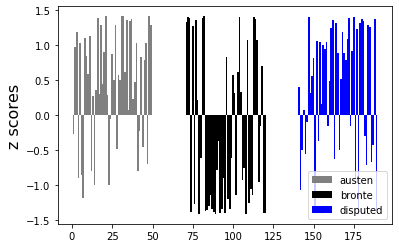

In [20]:
#%matplotlib qt
figure = plt.figure()
subplot = figure.add_subplot()

plt.ylabel('z scores', fontsize=16)

index = 1
width = 0

for each in austen_top50_zscores['austen']:
    if width==0:
        plt.bar(index+width, each, 1, color='grey', label='austen')
        width+=1
    else:
        plt.bar(index+width, each, 1, color='grey')
        width+=1
    
index += 70

width = 0
for each in bronte_top50_zscores['bronte']:
    if width==0:
        plt.bar(index+width, each, 1, color='black', label='bronte')
        width+=1
    else:
        plt.bar(index+width, each, 1, color='black')
        width+=1
    
index += 70

width = 0
for each in disputed_top50_zscores['disputed']:
    if width==0:
        plt.bar(index+width, each, 1, color='blue', label='disputed')
        width+=1
    else:
        plt.bar(index+width, each, 1, color='blue')
        width+=1

plt.legend()

## Based on the bar chart of zscores of top 50 common words, the zscores for austen and disputed are more similar than that of bronte and disputed. The author is likely austen

## Exercise 4 b2

## Delta b for each pair each pair between the three documents

In [21]:
deltab_bronte_austen = sum((Zscores['bronte'] - Zscores['austen']).abs())
deltab_bronte_austen

6223.0405804149295

In [22]:
deltab_bronte_disputed = sum((Zscores['bronte'] - Zscores['disputed']).abs())
deltab_bronte_disputed

5962.898651827579

In [23]:
deltab_austen_disputed = sum((Zscores['austen'] - Zscores['disputed']).abs())
deltab_austen_disputed

4859.135655462311

## Lower the Burrows Delta mean lower the Manhattan distance implying common use of words/phrases by the known author's and the disputed author. The texts from Austen and Disputed author have the least Burrows Delta of ~4859, while that between (Bronte, Austen) = ~6223, (Bronte, disputed author) = ~5962. Hence, the Author is most likely Austen. 

# # References:
### https://www.nltk.org/api/nltk.tokenize.html
### https://en.wikipedia.org/wiki/Standard_deviation
### https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781849513265/1/ch01lvl1sec16/plotting-multiple-bar-charts